# M1K
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [59]:
import xarray as xr

from geoplots import mapplot, yticks2lat

%matplotlib notebook

In [28]:
ncfile_ctl = 'data/precip.nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.nc'
ncfile_m1k = 'data/precip.nudgeclimo_all_model_CTL1860_M1K_tigercpu_intelmpi_18_576PE.atmos_month.nc'
pr_scale = 24*3600
new_dims = dict(grid_xt='lon', grid_yt='lat')


In [29]:
with xr.set_options(enable_cftimeindex=True):
    ctl = xr.open_dataarray(ncfile_ctl).rename(new_dims)
    m1k = xr.open_dataarray(ncfile_m1k).rename(new_dims)

In [30]:
ctl

<xarray.DataArray 'precip' (time: 3588, lat: 360, lon: 576)>
[744007680 values with dtype=float32]
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 4.688 ...
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

In [31]:
m1k

<xarray.DataArray 'precip' (time: 1800, lat: 360, lon: 576)>
[373248000 values with dtype=float32]
Coordinates:
  * time     (time) object 0101-01-16 12:00:00 0101-02-15 00:00:00 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 4.688 ...
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

In [38]:
tslice = slice('0151', '0250')
da = m1k.sel(time=tslice).mean('time') - ctl.sel(time=tslice).mean('time')

In [100]:
dpct = da.geo.fldmean()/ctl.sel(time=tslice).mean('time').geo.fldmean() *100

print(f'Global mean prcp change {dpct.item(): .2f} %/K')

Global mean prcp change -3.59 %/K


<IPython.core.display.Javascript object>


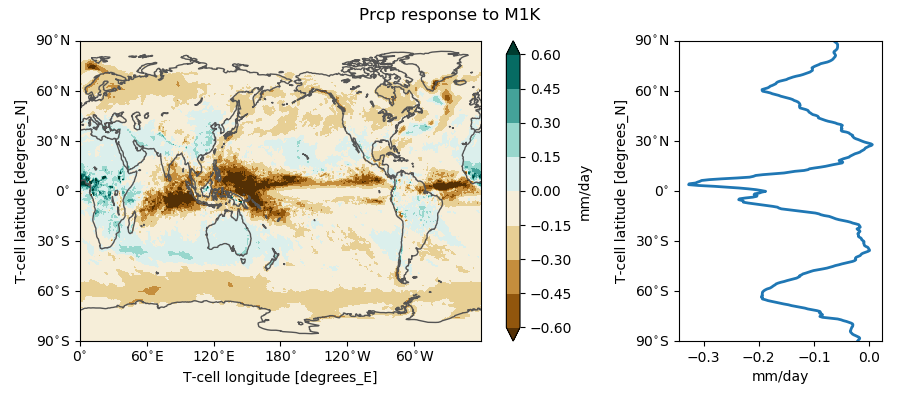

In [75]:
fig = plt.figure(figsize=(9,4))

ax1 = plt.subplot2grid((1,3),(0,0), colspan=2)
da.pipe(lambda x: x*pr_scale).rename('mm/day').plot(ax=ax,
                                                    cmap='BrBG', 
                                                    levels=10, 
                                                    robust=True,
                                                   )
plt.sca(ax1) 
mapplot()

ax = plt.subplot2grid((1,3),(0,2), colspan=3, sharey=ax)
da.pipe(lambda x: x.mean('lon')*pr_scale).rename('mm/day').plot(ax=ax, y='lat')
# plt.sca(ax)
# yticks2lat(np.arange(-90,91,30))
ax.set_ylim(-90,90)

plt.suptitle('Prcp response to M1K')
plt.tight_layout(rect=[0,0,1,0.95])

In [77]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>